In [1]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

# Weather regimes

#### TOC
1. Wind speed maps with HCLIM data<br>
    1.1 mean wind speeds<br>
    1.2 std deviation of mean wind speeds<br>
    1.2 percentage of low wind speeds<br>
    1.3 standard deviation of percentage of low wind speeds<br>
    1.4. Coefficient of variance of wind speed means<br>
2. Weibull distribution for different weather regimes in different el regions (1998-2018) <br>
3. Number of days per weather regime per year (1998-2018)
4. Correlation between weather regimes and wind power production (1998-2018)
5. Seasonal distribution of weather regimes (1998-2018)
6. Climate change impact: Sum of number of days for historical (1998-2018) and future (2040-2060) period for each cluster per season

In [2]:
# set up packages and paths dependencies
clusters_path = '/nobackup/rossby22/sm_ramfu/windenergy_project/clusters/'
path_hydrohazars = '/nobackup/rossby24/users/sm_ramfu/hydrohazards/'
from lib.init import *
import lib.helpers as h
from IPython.display import display
plot_path = h.plotpath

# Winter and sommer dominant weather regimes
wtwi = [1,6,10,3]
wtsu = [2,4,5,7]
HCLIMyears = np.arange(1998,2019)

## Total wind speed means (summer / winter)  

The wind maps are plotted with HCLIM 3.8 EC Earth wind data. 
The data shows the averaged wind speeds for all the days that are classified to same cluster. The classification covers the total time span of 1998-2018. When averaging the wind speeds for all the days within a cluster, no difference is made if the cluster-day happened during summer or winter.

(Data file name _*.wind_speedm_NEU-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_x2yn2v1_3hr_1998-2018.nc_)

In [3]:
# Compute the total spatial and temporal mean wind speed for each weather regime. 
means = {}
coords = ('projection_y_coordinate', 'projection_x_coordinate')
for wt in np.arange(1,11):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_wdmeantot"])
    means[wt] = float(cube.collapsed(coords, iris.analysis.MEAN).data)
display(means)

{1: 9.435100555419922,
 2: 6.774534225463867,
 3: 10.728102684020996,
 4: 6.791606426239014,
 5: 7.683833122253418,
 6: 9.543960571289062,
 7: 7.49013090133667,
 8: 7.858187198638916,
 9: 7.541601657867432,
 10: 8.520109176635742}

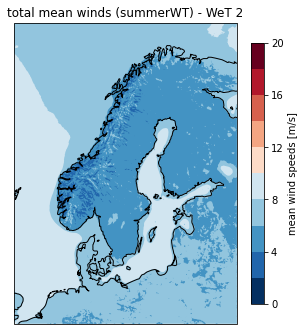

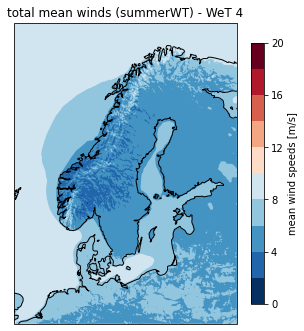

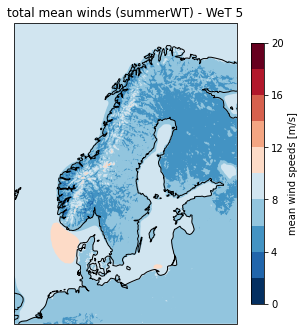

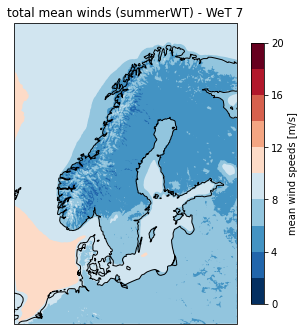

In [4]:
#fig,axs = plt.subplots(2,2)
levels = np.linspace(0,20,11)
for i,wt in enumerate(wtsu):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_wdmeantot"])
    fig, ax = plt.subplots(figsize=(5,6))
    a       = iplt.contourf(cube[:,:], cmap=RdBu, levels = levels)
    cbar    = fig.colorbar(a,label="mean wind speeds [m/s]", orientation="vertical",shrink=0.8)

    plt.title('total mean winds (summerWT) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path + "meanwinds_summer_{}.png".format(wt), dpi =300)
    


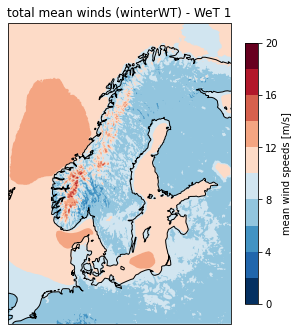

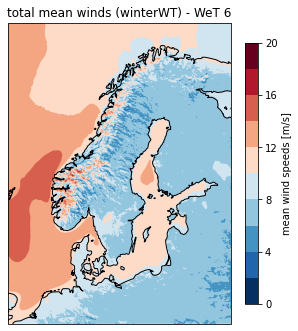

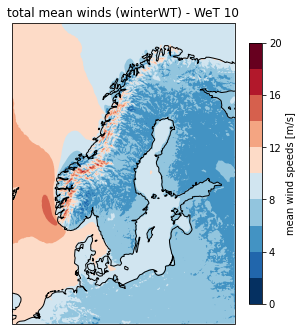

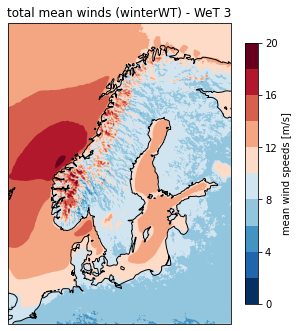

In [5]:
levels = np.linspace(0,20,11)
for i,wt in enumerate(wtwi):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_wdmeantot"])
    fig, ax = plt.subplots(figsize=(5,6))
    a    = iplt.contourf(cube[:,:], cmap=RdBu,levels = levels)
    cbar = plt.colorbar(a,label="mean wind speeds [m/s]", orientation="vertical",shrink=0.8)
    plt.title('total mean winds (winterWT) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"meanwinds_winter_{}.png".format(wt), dpi =300)


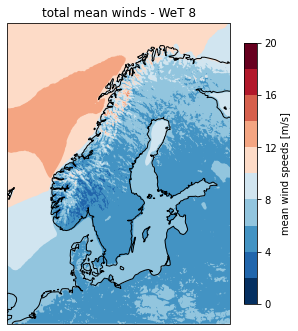

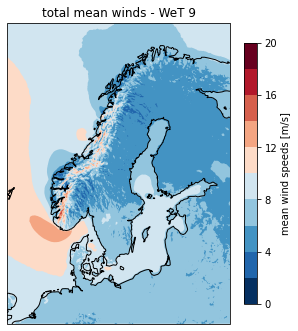

In [6]:
# rest of weather regimes
levels = np.linspace(0,20,11)
for wt in [8,9]:
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_wdmeantot"])
    fig, ax = plt.subplots(figsize=(5,6))
    a    = iplt.contourf(cube[:,:], cmap=RdBu,levels = levels)
    cbar = plt.colorbar(a,label="mean wind speeds [m/s]", orientation="vertical",shrink=0.8)
    plt.title('total mean winds - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"meanwinds_{}.png".format(wt), dpi =300)

### STD wind speeds (summer / winter)

In [7]:
# Compute average of std per weather regime
meanstd = {}
coords = ('projection_y_coordinate', 'projection_x_coordinate')
for wt in np.arange(1,11):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_std_wdmean"])
    meanstd[wt] = float(cube.collapsed(coords, iris.analysis.MEAN).data)
meanstd

{1: 3.052976608276367,
 2: 2.6869547367095947,
 3: 3.0791962146759033,
 4: 2.6599113941192627,
 5: 2.853001594543457,
 6: 2.9211342334747314,
 7: 2.803833246231079,
 8: 2.706538438796997,
 9: 2.813462734222412,
 10: 2.9379897117614746}

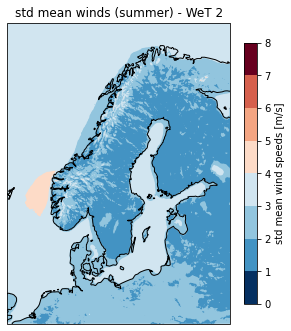

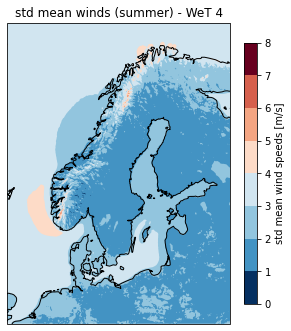

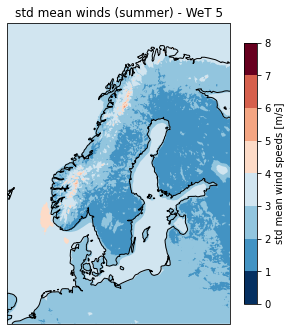

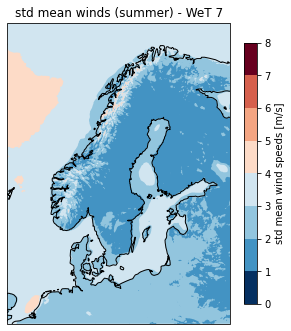

In [8]:
levels = np.linspace(0,8,9)
for i,wt in enumerate(wtsu):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_std_wdmean"])
    fig, ax = plt.subplots(figsize=(5,6))
    a    = iplt.contourf(cube[:,:],cmap=RdBu,levels=levels)
    cbar = plt.colorbar(a,label="std mean wind speeds [m/s]", orientation="vertical",shrink=0.8)
    plt.title('std mean winds (summer) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"STD_meanwinds_summer_{}.png".format(wt), dpi =300)

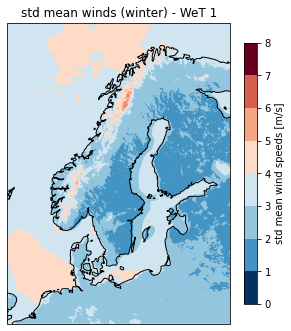

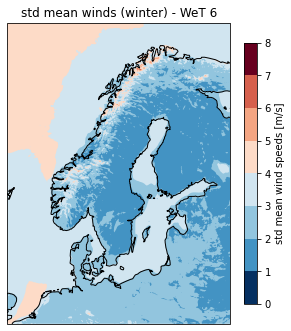

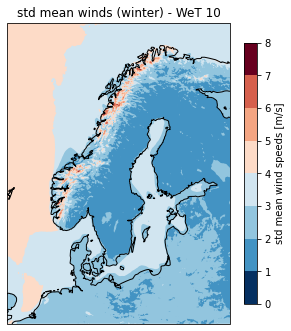

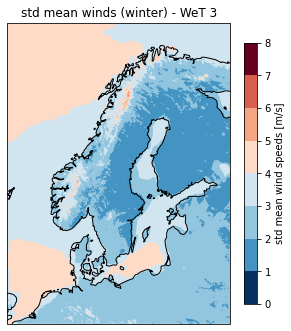

In [9]:
levels = np.linspace(0,8,9)
for i,wt in enumerate(wtwi):
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_std_wdmean"])
    fig, ax = plt.subplots(figsize=(5,6))
    a = iplt.contourf(cube[:,:], cmap=RdBu,levels=levels)
    cbar = plt.colorbar(a,label="std mean wind speeds [m/s]", orientation="vertical",shrink=0.8)
    plt.title('std mean winds (winter) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"STD_meanwinds_winter_{}.png".format(wt), dpi =300)

### PERC of ws<4.5m/s speeds (summer / winter) 

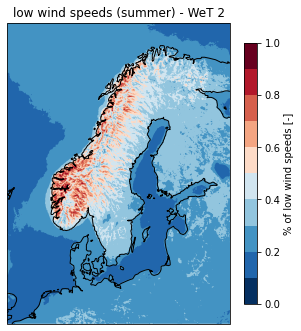

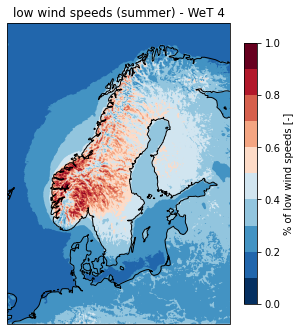

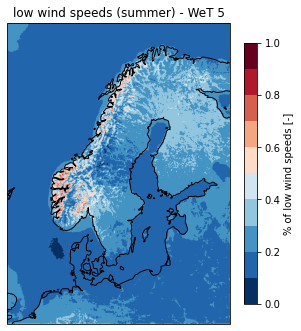

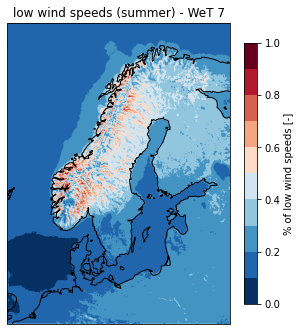

In [10]:
levels = np.linspace(0,1,11)
for i,wt in enumerate(wtsu):
    fig, ax = plt.subplots(figsize=(5,6))
    f    = h.create_filenames(wt)
    cube = iris.load_cube(f["f_percmean_lwd"])
    a    = iplt.contourf(cube[:,:],cmap=RdBu, levels=levels)
    cbar = plt.colorbar(a,label="% of low wind speeds [-]", orientation="vertical",shrink=0.8)
    plt.title('low wind speeds (summer) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"Perc_lws_summer_{}.png".format(wt), dpi =300)

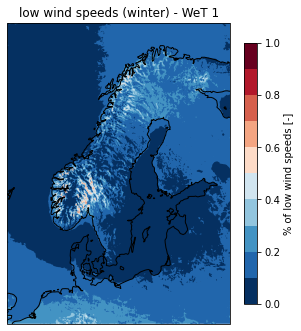

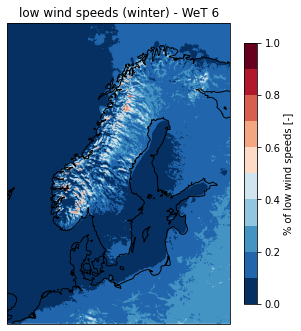

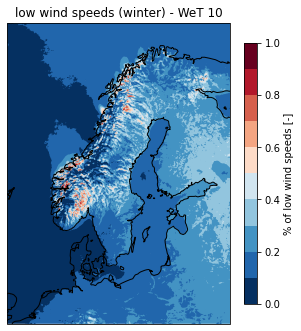

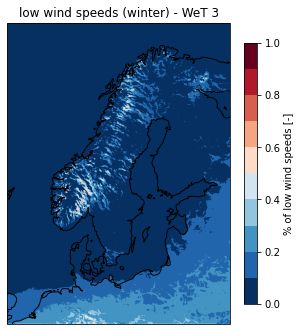

In [11]:
levels = np.linspace(0,1,11)
for i,wt in enumerate(wtwi):
    fig, ax = plt.subplots(figsize=(5,6))
    f       = h.create_filenames(wt)
    cube    = iris.load_cube(f["f_percmean_lwd"])
    a    = iplt.contourf(cube[:,:], cmap=RdBu, levels=levels)
    cbar = plt.colorbar(a, label="% of low wind speeds [-]", orientation="vertical",shrink=0.8)
    plt.title('low wind speeds (winter) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"Perc_lws_winter_{}.png".format(wt), dpi =300)


### STD of percentage of low wind speed periods (summer / winter)

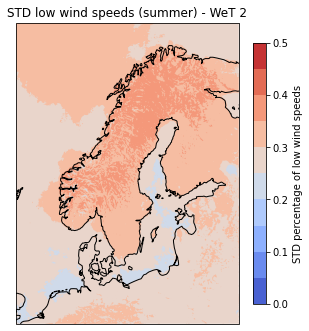

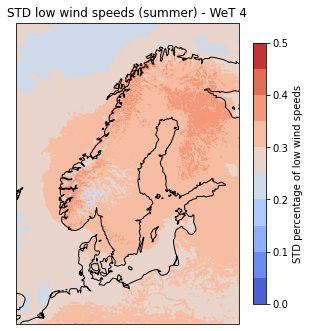

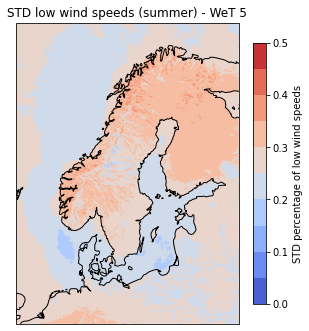

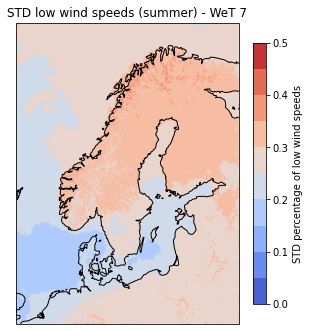

In [12]:
levels = np.linspace(0.0, 0.5, 11)
for i,wt in enumerate(wtsu):
    fig, ax = plt.subplots(figsize=(5,6))
    f       = h.create_filenames(wt)
    cube    = iris.load_cube(f["f_std_perc_lwd"])
    a    = iplt.contourf(cube[:,:], cmap=cw, levels=levels)
    cbar = plt.colorbar(a,label="STD percentage of low wind speeds", orientation="vertical",shrink=0.8)
    plt.title('STD low wind speeds (summer) - WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"td_Perc_lws_summer_{}.png".format(wt), dpi =300)

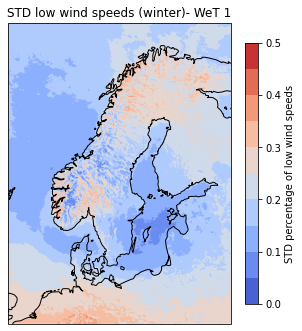

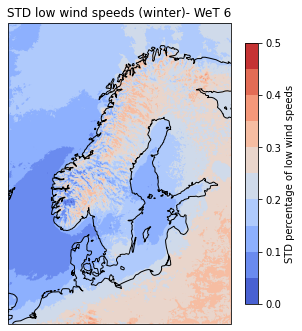

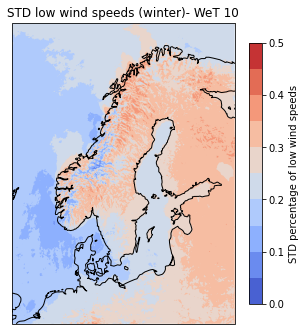

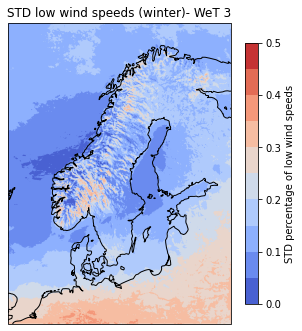

In [13]:
levels = np.linspace(0.0, 0.5, 11)
for i,wt in enumerate(wtwi):
    fig, ax = plt.subplots(figsize=(5,6))
    f       = h.create_filenames(wt)
    cube = iris.load_cube(f["f_std_perc_lwd"])
    a    = iplt.contourf(cube[:,:], cmap=cw, levels=levels)
    cbar = plt.colorbar(a,label="STD percentage of low wind speeds", orientation="vertical",shrink=0.8)
    plt.title('STD low wind speeds (winter)- WeT {}'.format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"Std_Perc_lws_winter_{}.png".format(wt), dpi =300)


### Coefficient of variance wind speeds  (summer / winter)

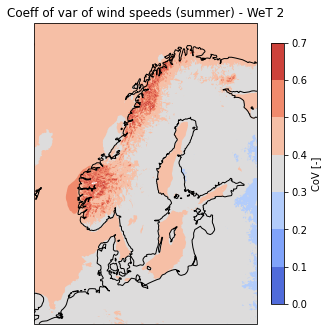

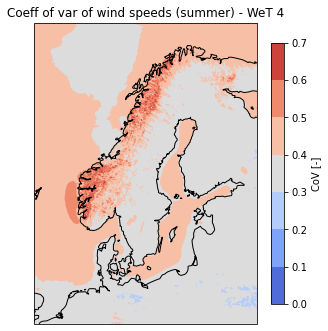

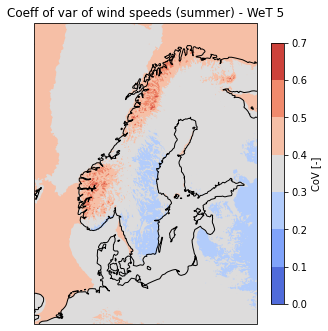

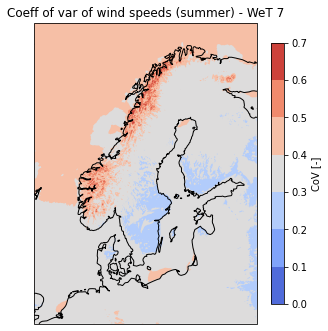

In [14]:
levels = np.linspace(0.0, 0.7, 8)
for i,wt in enumerate(wtsu):
    fig, ax = plt.subplots(figsize=(5,6))
    f       = h.create_filenames(wt)
    cube    = iris.load_cube(f["CoV"])
    a    = iplt.contourf(cube[:,:], cmap=cw, levels=levels)
    cbar = plt.colorbar(a,label="CoV [-]", orientation="vertical",shrink=0.8)
    plt.title("Coeff of var of wind speeds (summer) - WeT {}".format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"CoVws_summer_{}.png".format(wt), dpi =300)


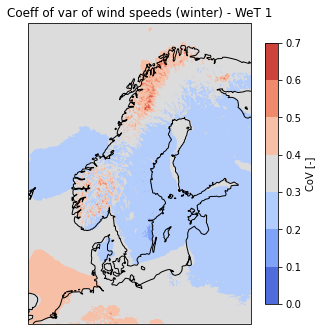

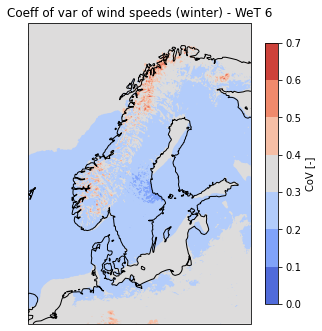

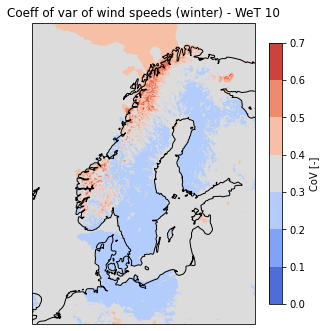

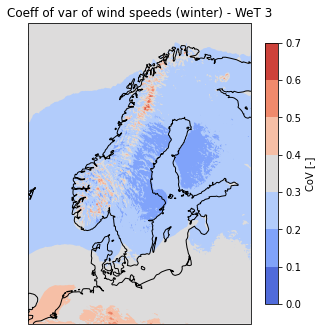

In [15]:
levels = np.linspace(0.0, 0.7, 8)
for i,wt in enumerate(wtwi):
    fig, ax = plt.subplots(figsize=(5,6))
    f       = h.create_filenames(wt)
    cube = iris.load_cube(f["CoV"])
    a    = iplt.contourf(cube[:,:], cmap=cw, levels=levels)
    cbar = plt.colorbar(a,label="CoV [-]", orientation="vertical",shrink=0.8, )
    plt.title("Coeff of var of wind speeds (winter) - WeT {}".format(wt))
    plt.gca().coastlines()
    plt.savefig(plot_path+"CoVws_winter_{}.png".format(wt), dpi =300)


# Weibull distributions of wind speeds in weather regimes


Distribution is provided by ramon.fuentesfranco@smhi.se.
The weibul distributuion is computed with HCLIM driven by ERA-interim data.

In [16]:
import scipy as sp
#import sys, os
#sys.path.append(os.path.abspath('../KLIVEN/src/'))
GAMSregions = h.get_GAMSregions()
colors = ['red','blue','green','cyan']


## Winter weather types

mean SE1 1 9.549489498178012
mean SE1 3 9.507098674800648
mean SE1 6 8.95810461047573
mean SE1 10 7.053943456686547
mean SE2 1 8.771781444551753
mean SE2 3 9.778424739843755
mean SE2 6 8.553400516511893
mean SE2 10 7.006621599205818
mean SE3 1 9.631846904756818
mean SE3 3 9.869917392778877
mean SE3 6 7.878310918817753
mean SE3 10 7.490262746828368
mean SE4 1 8.96274995804588
mean SE4 3 10.072478771213955
mean SE4 6 7.547480821610177
mean SE4 10 6.888166189197138


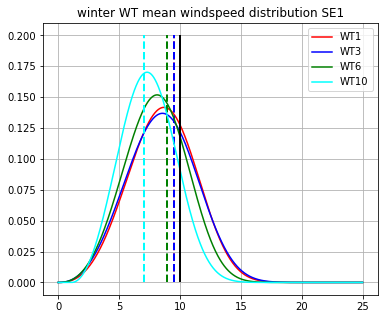

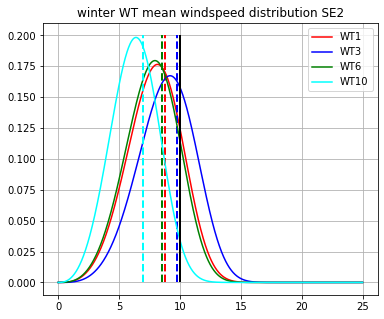

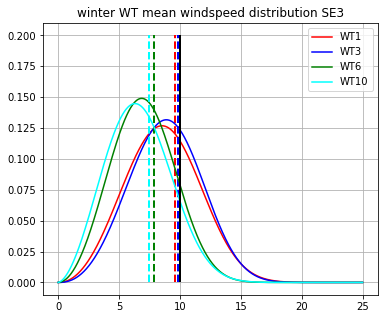

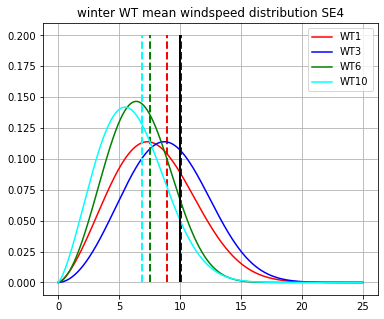

In [17]:
for reg in ["SE1","SE2","SE3","SE4"]:
    plt.figure(figsize=(6,5))
    for wt, color in zip([1,3,6,10],colors):
        with open(clusters_path + reg  + '{}.txt'.format(wt)) as f:
            lines = f.readlines()
        weibull_params = []
        [weibull_params.append(float(l)) for l in lines]
        x = np.linspace(0, 25, 1000)  
        y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
        print('mean', reg, wt, weibull_params[2])
        plt.plot(x, y_weibull,color = color, label='WT'+str(wt),)
        plt.grid('True')
        plt.legend()
        plt.title('winter WT mean windspeed distribution '+reg)
        plt.vlines(x=weibull_params[-1], ymin=0, ymax=0.2, 
                   colors=color, linestyle='--', linewidth=2)
        plt.vlines(x=10, ymin=0, ymax=0.2, 
                   colors='black', linewidth=2)
        plt.savefig(plot_path+"weibull_{}_winter.png".format(reg), dpi =300)


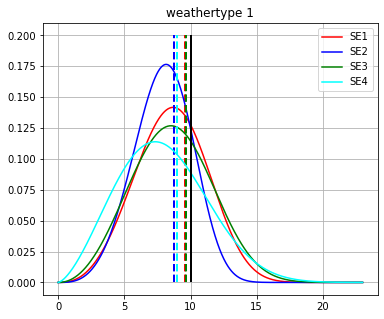

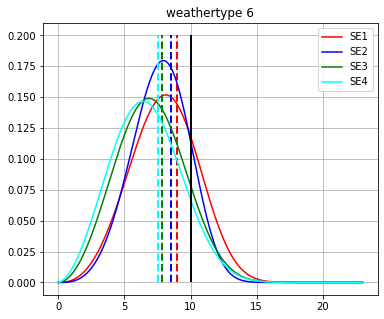

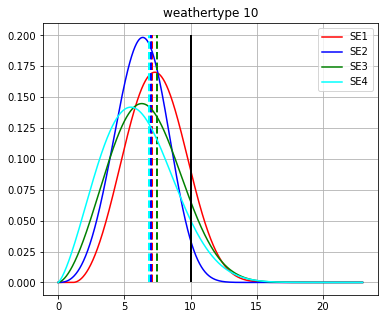

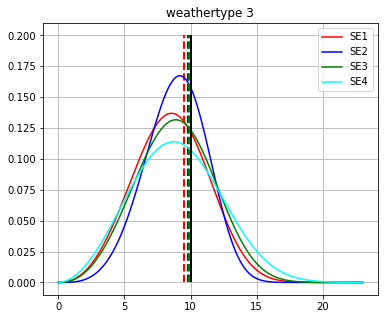

In [18]:
for wt in wtwi:
    plt.figure(figsize=(6,5))
    for reg, color in zip(["SE1","SE2","SE3","SE4"],colors):
        with open(clusters_path + reg  + '{}.txt'.format(wt)) as f:
            lines = f.readlines()
        weibull_params = []
        [weibull_params.append(float(l)) for l in lines]
        x = np.linspace(0, 23, 1000)  
        y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
        #print('mean', reg, wt, weibull_params[2])
        plt.plot(x, y_weibull,color = color, label=reg)
        plt.grid('True')
        plt.legend()
        plt.title('weathertype {}'.format(wt))
        plt.vlines(x=weibull_params[-1], ymin=0, ymax=0.2, 
                   colors=color, linestyle='--', linewidth=2)
        plt.vlines(x=10, ymin=0, ymax=0.2, 
                   colors='black', linewidth=2)
        plt.savefig(plot_path+"weibull_{}_SE.png".format(wt), dpi =300)


## Summer weather types

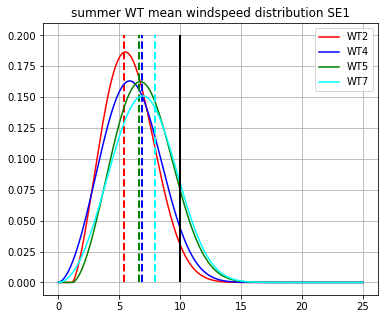

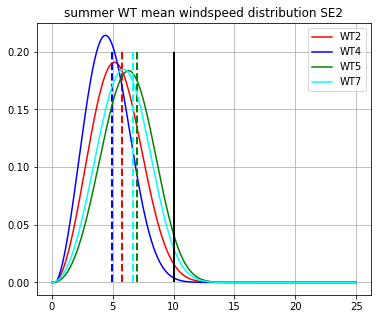

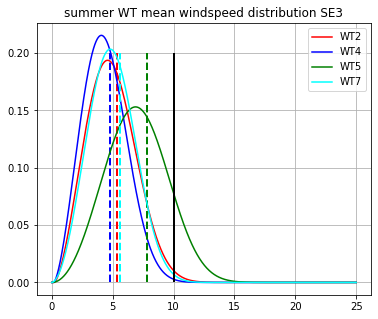

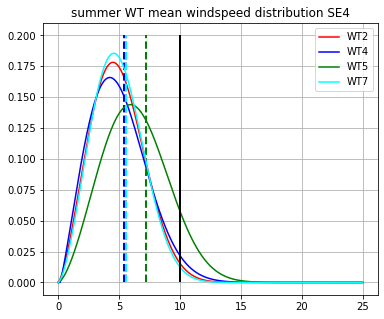

In [19]:
#for reg in GAMSregions.keys():
for reg in ["SE1","SE2","SE3","SE4"]:
    plt.figure(figsize=(6,5))
    for wt, color in zip(wtsu,colors):
        with open(clusters_path + reg  + '{}.txt'.format(wt)) as f:
            lines = f.readlines()
        weibull_params = []
        [weibull_params.append(float(l)) for l in lines]
        x = np.linspace(0, 25, 1000)  
        y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
        plt.plot(x, y_weibull,color = color, label='WT'+str(wt),)
        plt.grid('True')
        plt.legend()
        plt.title('summer WT mean windspeed distribution '+reg)
        plt.vlines(x=weibull_params[-1], ymin=0, ymax=0.2, 
                   colors=color, linestyle='--', linewidth=2)
        plt.vlines(x=10, ymin=0, ymax=0.2, 
                   colors='black', linewidth=2) 
        plt.savefig(plot_path+"weibull_{}_summer.png".format(reg), dpi =300)


mean SE1 2 5.374036550534628
mean SE2 2 5.792731046677343
mean SE3 2 5.324665784836955
mean SE4 2 5.5852811336566255
mean SE1 4 6.869945287760723
mean SE2 4 4.940963506699422
mean SE3 4 4.765830278398848
mean SE4 4 5.4446108341231945
mean SE1 5 6.624375581753051
mean SE2 5 7.033027887346149
mean SE3 5 7.839707136155742
mean SE4 5 7.189399480822292
mean SE1 7 7.944331884441995
mean SE2 7 6.666546106339687
mean SE3 7 5.582501649863072
mean SE4 7 5.555691480638078


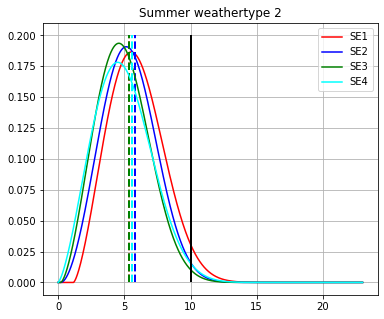

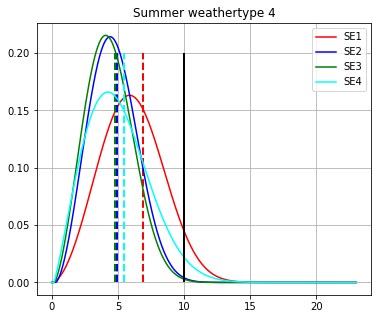

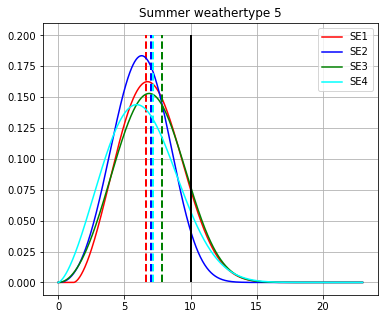

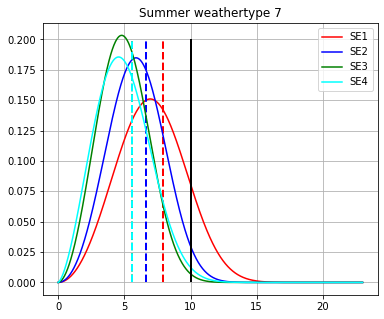

In [20]:
for wt in wtsu:
    plt.figure(figsize=(6,5))
    for reg, color in zip(["SE1","SE2","SE3","SE4"],colors):
        with open(clusters_path + reg  + '{}.txt'.format(wt)) as f:
            lines = f.readlines()
        weibull_params = []
        [weibull_params.append(float(l)) for l in lines]
        x = np.linspace(0, 23, 1000)  
        y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
        print('mean', reg, wt, weibull_params[2])
        plt.plot(x, y_weibull,color = color, label=reg)
        plt.grid('True')
        plt.legend()
        plt.title('Summer weathertype {}'.format(wt))
        plt.vlines(x=weibull_params[-1], ymin=0, ymax=0.2, 
                   colors=color, linestyle='--', linewidth=2)
        plt.vlines(x=10, ymin=0, ymax=0.2, 
                   colors='black', linewidth=2)
        plt.savefig(plot_path+"weibull_{}_SE.png".format(wt), dpi =300)


## Number of days per weather regime **per year** (1998-2018)

(Data from Ramon
Following path needs to be available: _'/nobackup/rossby24/users/sm_ramfu/hydrohazards/yearsum.weather_type{}.nc'_)

**Note**: This weather regime data set is not split into different seasons, but all days / weather regime / year are taken into account. 

In [21]:
wr_w = [1,3,6,8,10]
wr_s = [2,4,5,7]
repryears = [2012,2000,2003,1999,2005]

In [22]:
## Total days per weather type per year
pal = sns.color_palette("hls", len(repryears))
cube={}
for wr in np.arange(1,11):
    path = '/nobackup/rossby24/users/sm_ramfu/hydrohazards/yearsum.weather_type{}.nc'.format(wr)
    cube[wr] = iris.load_cube(path)

In [23]:
# Save all 10 weather regimes in one Pandas data frame
import iris.pandas
wr_df = pd.DataFrame(columns=['year', 'WeatherRegime','ndays'])
for wr in np.arange(1,11):
    ndays = iris.pandas.as_series(cube[wr][:,0,0], copy=True)
    ndays = ndays.reset_index()[0]
    year   = pd.Series(np.arange(1998,2019))
    wreg     = pd.Series(wr,index=range(len(year)))
    frame = {'year':year, 'WeatherRegime': wreg, 'ndays':ndays}
    df_i = pd.DataFrame(frame)
    wr_df   = pd.concat([wr_df, df_i],ignore_index=True)
wr_df = wr_df[wr_df["year"]!=1998]

In [24]:
# Get a summer and a winter data frame
wr_winter_df = wr_df[wr_df['WeatherRegime'].isin(wr_w)]
wr_summer_df = wr_df[wr_df['WeatherRegime'].isin(wr_s)]

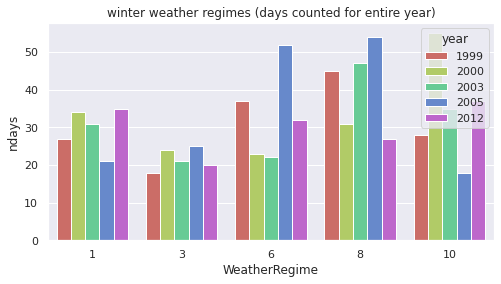

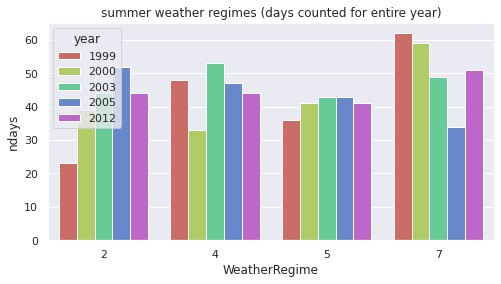

In [25]:
# Plot winter regimes for representative years
sns.set(rc={'figure.figsize':(8,4)})
data = wr_winter_df[wr_winter_df["year"].isin(repryears)]
ax= sns.barplot(data=data, x='WeatherRegime', y='ndays', hue='year', palette=pal)
ax.set_title('winter weather regimes (days counted for entire year)')
plt.savefig(h.plotpath + "ndays_pyear_pweatherregime_winter.png".format(reg), dpi =300)


# Plot summer regimes for representative years
plt.figure()
data = wr_summer_df[wr_summer_df["year"].isin(repryears)]
ax= sns.barplot(data=data, x='WeatherRegime', y='ndays', hue='year',palette=pal)
plt.title('summer weather regimes (days counted for entire year)')
plt.savefig(h.plotpath + "ndays_pyear_pweatherregime_summer.png".format(reg), dpi =300)


The number of the days of each weather type is different during the years. In the following a stack plot displays the differences. The color coding shows 10 colors, transitioning  from dark blue to dark red. This is correlated to the absolut mean wind speeds in each weather type. (The mean of the Scandinavian wind maps shown above). Dark blue represents the lowest mean, dark red the highest.
Only the years that have been run in the energy system model are plotted.

In [26]:
# ' means ' is the dict of the mean wind speeds per weather type, that are sorted by their absolute values from lowest to highest
wr_sorted = np.argsort(list(means.values())) 

# Create the color coding
palWR        = sns.color_palette("RdBu",10)
palWR_sorted = list()
wr_sorted    = wr_sorted[::-1]
[palWR_sorted.append(palWR[i]) for i in wr_sorted]

[None, None, None, None, None, None, None, None, None, None]

{1: 9.435100555419922,
 2: 6.774534225463867,
 3: 10.728102684020996,
 4: 6.791606426239014,
 5: 7.683833122253418,
 6: 9.543960571289062,
 7: 7.49013090133667,
 8: 7.858187198638916,
 9: 7.541601657867432,
 10: 8.520109176635742}

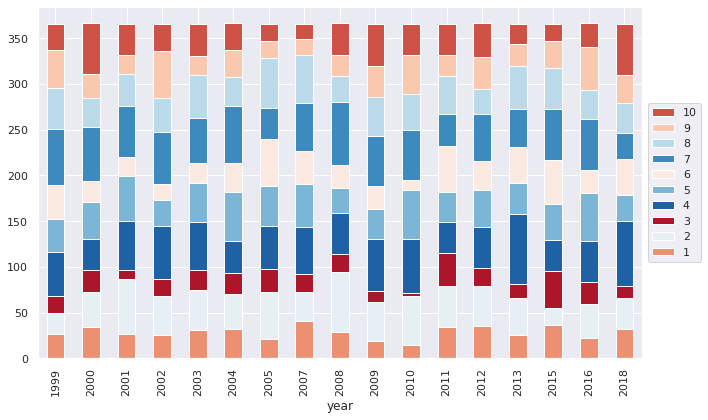

In [27]:
# Plot the distribution of days in weather regimes for the different years in a stack plot
sns.set(rc={'figure.figsize':(10,6)})
gamsyears = [1999,2000,2001,2002,2003,2004,2005,2007,2008, 2009,2010, 2011, 2012,2013,2015,2016,2018]

# NOTE: Only the years that have been modelled in the energy system model are plotted.
# For plotting all available years, use 'HCLIMyears' instead of 'gamsyears' as array of years

wr_df_gamsyears = wr_df[wr_df['year'].isin(gamsyears)]
# reorganize data
wr_df_gamsyears = wr_df_gamsyears.pivot(index='year', columns='WeatherRegime', values='ndays')
ax = wr_df_gamsyears.plot(kind="bar", stacked=True, color=palWR_sorted)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
plt.savefig(h.plotpath + "weatherregimes_compared.png".format(reg), dpi =300)
fig.show()
means


## Correlation between weather regimes and wind power production

Here we compute the correlation between the number of days appearing in weather regime x and the a wind power indicator in a electricity region.
A wind power indicator is either the FLH (Full Load Hour) or the LPP (Low power periods). 

The Pearson correlation coefficient R is used for measuring the correlation between the two data sets. The combinations of a high value get plotted. A correlation matrix is plotted for all combinations.

Data for wind power indicators: ERA5

Data used for weather regimes: HCLIM - ERA-INT driven

(Note: In principle we could have used HCLIM-historical data for computing the FLH, LPP, .. parameters.)


In [28]:
import lib.helpers as h
# Load dataframe containing all years of ERA5 indicators FLH,LPP and ZPD

os.path.exists(h.inddatapath + "ERA5_DF_1999_2018.pkl")
ERA5_DF     = h.load_object(h.inddatapath + "ERA5_DF_1999_2018.pkl")
HCLIM_DF    = h.load_object(h.inddatapath + "HCLIM_hist_DF_1985_2005.pkl")

display(ERA5_DF)  # ERA-INT wind power data 
display(wr_df)    # HCLIM data  weather regime
display(HCLIM_DF) # HCLIM wind power data. NOTE: We do not have the data up to 2018, so I used ERA5 data!

year region       LPP          FLH       ZPD
0    1999    DK1  0.094521  4661.568831  0.113128
1    1999    DK2  0.071233  4804.517568  0.083219
2    1999     FI  0.087329  4730.375653    0.0629
3    1999    SE1  0.128767  4479.556996  0.137785
4    1999    SE2     0.075  4743.705697  0.047374
..    ...    ...       ...          ...       ...
195  2018    SE3  0.127397   4611.78863   0.18516
196  2018    SE4  0.098288  4833.628578  0.110731
197  2018    NO1  0.050342  4712.618938  0.022603
198  2018    NO2  0.133219  4645.092004  0.099201
199  2018    NO3  0.066438  4852.404025  0.026027

[200 rows x 5 columns]

year WeatherRegime ndays
1    1999             1  27.0
2    2000             1  34.0
3    2001             1  27.0
4    2002             1  26.0
5    2003             1  31.0
..    ...           ...   ...
205  2014            10  49.0
206  2015            10  18.0
207  2016            10  26.0
208  2017            10  28.0
209  2018            10  55.0

[200 rows x 3 columns]

year region       LPP          FLH       ZPD
0    1985    DK1  0.093493  5114.021093   0.07226
1    1985    DK2  0.079795  5218.693177  0.060959
2    1985     FI  0.022945  4914.979143  0.058219
3    1985    SE1  0.093836  4967.284778  0.085616
4    1985    SE2  0.035959  5101.810788  0.026027
..    ...    ...       ...          ...       ...
205  2005    SE3  0.147945  4790.526956  0.171233
206  2005    SE4  0.132192  4501.567044  0.142466
207  2005    NO1  0.157534  4513.161865  0.074315
208  2005    NO2  0.111301  4819.817692  0.076712
209  2005    NO3  0.122603  4486.222038  0.041781

[210 rows x 5 columns]

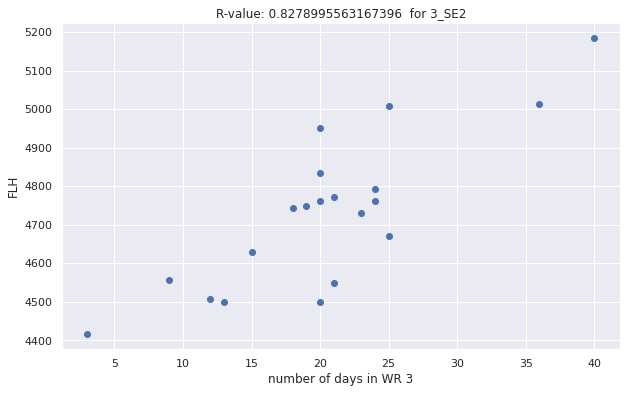

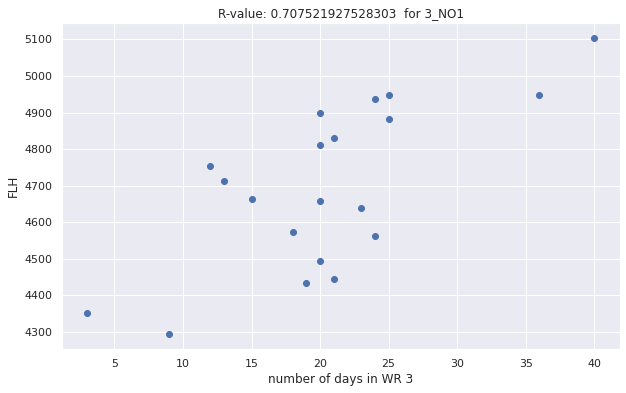

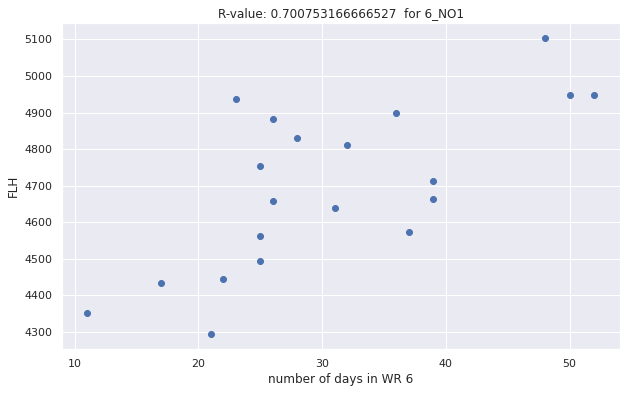

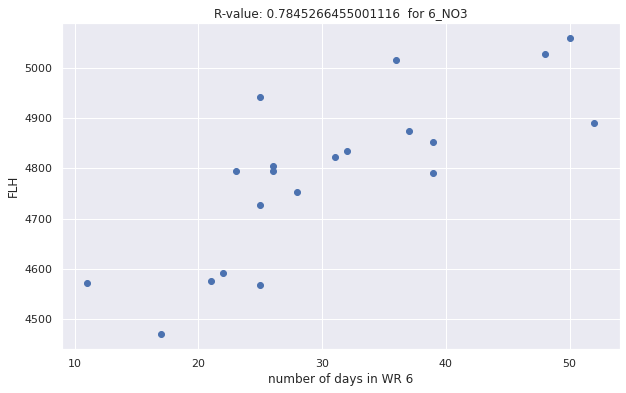

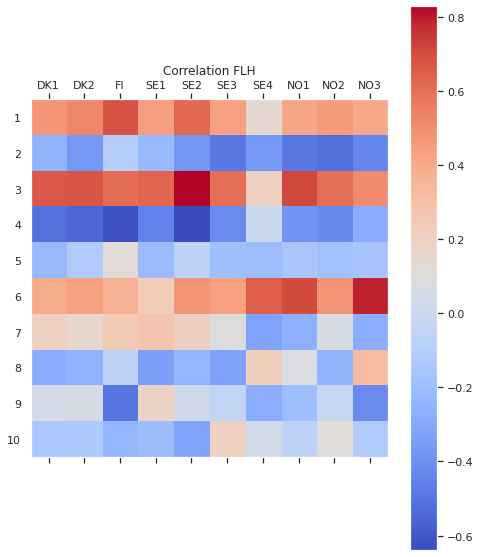

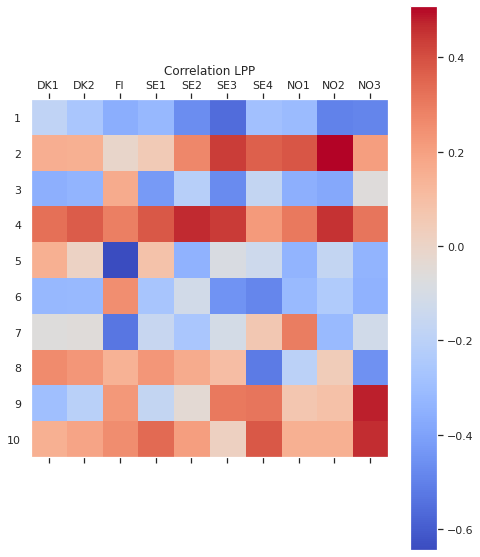

In [29]:
# Create correlation matrix for FLH and LPP (ERA-INT) vs Weather regime days (HCLIM)
# and plot scatter plot for the highest correlation

for var in ['FLH', 'LPP'] :
    pearson={}
    for reg in GAMSregions.keys(): 
        pearson_list=[]
        y = ERA5_DF[ERA5_DF["region"]==reg][var].values

        for wr in np.arange(1,11):
            wrn = wr_df[wr_df["WeatherRegime"]==wr]
            x = wrn['ndays'].values
            pear = sp.stats.pearsonr(x, y)[0]
            pearson_list.append(pear)
            # Plot if correlation is significant
            if abs(pear)>0.7:
                plt.figure()
                plt.scatter(x, y)
                plt.ylabel(var)
                plt.xlabel('number of days in WR {}'.format(wr))
                plt.title('R-value: {}  for {}_{}'.format(pear,wr,reg))
                plt.savefig(h.plotpath + 'Pearson_{}_{}.png'.format(reg,var), dpi=300)
                plt.show()
        pearson[reg]=pearson_list


    corrvar = pd.DataFrame(pearson, index=np.arange(1,11))
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corrvar,cmap=plt.cm.coolwarm)
    fig.colorbar(cax,)
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    ax.set_xticklabels(list(GAMSregions.keys()))
    ax.set_yticklabels(np.arange(1,11))
    plt.title('Correlation {}'.format(var))
    plt.grid(False)
    plt.savefig(h.plotpath + 'CorrelationMatrix_{}.png'.format(var), dpi=300)

##  Seasonal distribution of weather regimes (1998-2018)

Data set: HCLIM driven by ERA-interim data.

provided by ramon.fuentesfranco@smhi.se.

In [30]:
# Load data into cubes with iris package and
# create a dict containing all weather type data cubes

cubemonth={}
for wr in np.arange(1,11):
    path1 = '/nobackup/rossby24/users/sm_ramfu/hydrohazards/monsum.day.weather_type{}.nc'.format(wr)
    cubemonth[wr] = iris.load_cube(path1)

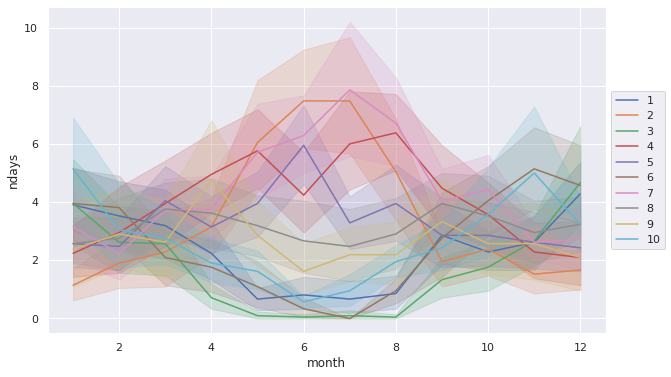

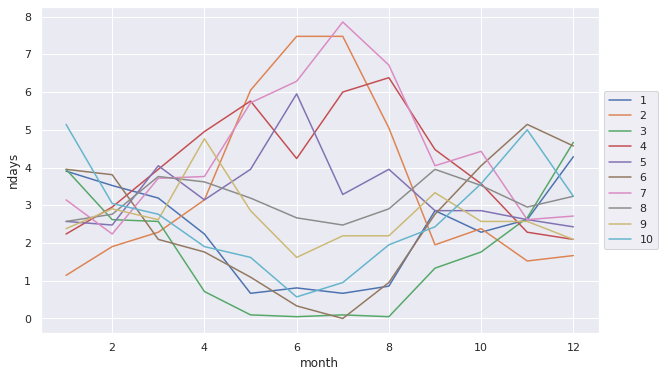

In [31]:
# Transform dict with cubes to pandas dataframe
addyears = HCLIMyears.repeat(12)
seas_months = []
[seas_months.append(np.arange(1,13)) for i in range(21)]
seas_months = np.concatenate(seas_months)


wr_seas_df = pd.DataFrame(columns = ['year', 'month', 'WeatherRegime', 'ndays'])
for wr in np.arange(1,11):
    ndays = pd.Series(np.concatenate(np.concatenate(np.array(cubemonth[wr].data[:]))))
    wre   = pd.Series(wr, index=range(12*21))
    year  = pd.Series(addyears)
    month = pd.Series(seas_months)
    frame = {'year':year, 'month': month, 'WeatherRegime': wre, 'ndays':ndays}
    df_i = pd.DataFrame(frame)
    wr_seas_df   = pd.concat([wr_seas_df, df_i],ignore_index=True)

# Plot with 95% confidence interval
sns.lineplot(data=wr_seas_df, x='month', y='ndays', hue='WeatherRegime', palette = sns.color_palette())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(h.plotpath + 'seasonal_wr_variance.png', dpi=300)
fig.show()

# Plot only mean
plt.figure()
sns.lineplot(data=wr_seas_df, x='month', y='ndays', hue='WeatherRegime', palette = sns.color_palette(), ci=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(h.plotpath + 'seasonal_wr_average.png', dpi=300)
fig.show()

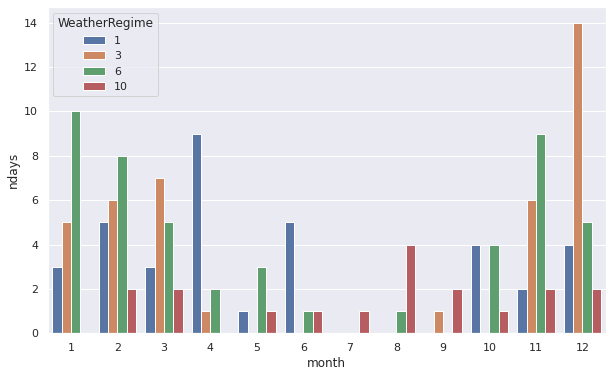

In [32]:
# Plt days per month for a specific year
y_i = 2015
data = wr_seas_df[wr_seas_df['WeatherRegime'].isin((3,6,1,10))]
data = wr_seas_df[(wr_seas_df['year']==y_i) & (wr_seas_df['WeatherRegime'].isin((3,6,1,10)))]
sns.barplot(data=data, x='month', y='ndays', hue='WeatherRegime', palette = sns.color_palette())
plt.savefig(h.plotpath + 'seasonal_wr_{}.png'.format(y_i), dpi=300)

## Climate change impact: **Sum of Number of days** for historical (1998-2018) and future (2040-2060)  period for each cluster **per season**

This number of days in each cluster is based on HCLIM EC-EARTH and HCLIM GFDL data. 

**NOTE**: The cluster numbers related to HCLIM data are different than the cluster numbers related to ERA-Interim. The clusters in itself should be very similar. 
A DF is created that contains both cluster definitions, but after that and for the plots the ERA-INT cluster name defintion will be used.

(data provided by Petter Lind petter.lind@smhi.se)

In [33]:
f = open(h.datapath + "cluster_size_distribution.pkl", "rb")
cld = pickle.load(f)

df = pd.DataFrame(columns = ['season', 'model', 'scenario', 'weathertype', 'weathertype_HCLIM', 'ndays'])
totdays = 20*365 #20 years * 365 days # PER SEASON(?)
for seas in ['ONDJFM','AMJJAS']:
    for mod in ['ece','gfdl']:
        for scen in ['his','mc']:
            weathertype_petter = pd.Series([int(i+1) for i in range(10)])
            weathertype = pd.Series([3,9,7,8,4,10,6,2,5,1])
            ndays       = pd.Series(cld[seas][mod][scen].values())/20
            season      = pd.Series(seas, index=range(10))
            model       = pd.Series(mod,  index = range(10))
            scenario    = pd.Series(scen, index = range(10))
            frame = {'season':season, 'model':model, 'scenario':scenario, 'weathertype_HCLIM':weathertype_petter, 'weathertype':weathertype, 'ndays':ndays}
            df_i = pd.DataFrame(frame)
            df = pd.concat([df,df_i], ignore_index = True)


### Table of historical  and future number of days per season and weather regime


In [34]:
display(df[(df['model']=='ece')&(df['scenario']=='his')])
display(df[(df['model']=='ece')&(df['scenario']=='mc')])

season model scenario weathertype weathertype_HCLIM  ndays
0   ONDJFM   ece      his           3                 1   15.2
1   ONDJFM   ece      his           9                 2  18.25
2   ONDJFM   ece      his           7                 3   17.9
3   ONDJFM   ece      his           8                 4   20.4
4   ONDJFM   ece      his           4                 5   17.4
5   ONDJFM   ece      his          10                 6  22.45
6   ONDJFM   ece      his           6                 7  23.15
7   ONDJFM   ece      his           2                 8  12.55
8   ONDJFM   ece      his           5                 9  17.15
9   ONDJFM   ece      his           1                10   17.8
40  AMJJAS   ece      his           3                 1   1.15
41  AMJJAS   ece      his           9                 2  24.95
42  AMJJAS   ece      his           7                 3   26.8
43  AMJJAS   ece      his           8                 4  18.35
44  AMJJAS   ece      his           4                 5  36.95
45  AMJJAS   ece      his          10                 6    8.8
46  AMJJAS   ece      his           6                 7   4.35
47  AMJJAS   ece      his           2                 8  33.75
48  AMJJAS   ece      his           5                 9  20.95
49  AMJJAS   ece      his           1                10   6.95

season model scenario weathertype weathertype_HCLIM  ndays
10  ONDJFM   ece       mc           3                 1  17.25
11  ONDJFM   ece       mc           9                 2  18.05
12  ONDJFM   ece       mc           7                 3   18.6
13  ONDJFM   ece       mc           8                 4  19.65
14  ONDJFM   ece       mc           4                 5   15.5
15  ONDJFM   ece       mc          10                 6   22.4
16  ONDJFM   ece       mc           6                 7  25.45
17  ONDJFM   ece       mc           2                 8  11.85
18  ONDJFM   ece       mc           5                 9  14.35
19  ONDJFM   ece       mc           1                10  19.15
50  AMJJAS   ece       mc           3                 1   1.95
51  AMJJAS   ece       mc           9                 2  24.05
52  AMJJAS   ece       mc           7                 3  26.85
53  AMJJAS   ece       mc           8                 4  20.65
54  AMJJAS   ece       mc           4                 5  35.75
55  AMJJAS   ece       mc          10                 6   8.25
56  AMJJAS   ece       mc           6                 7   3.55
57  AMJJAS   ece       mc           2                 8   31.9
58  AMJJAS   ece       mc           5                 9  22.15
59  AMJJAS   ece       mc           1                10    7.9

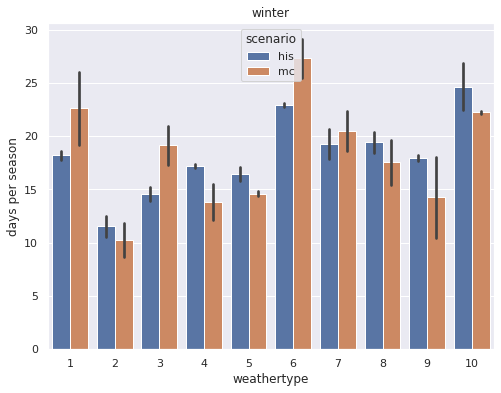

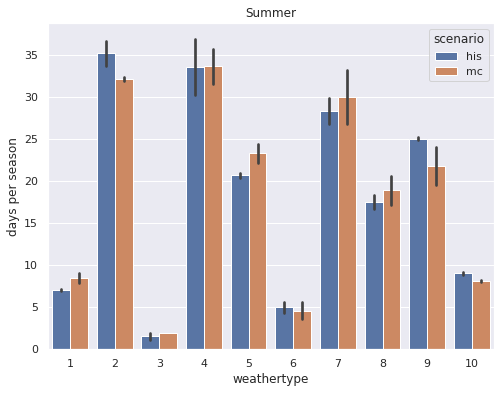

In [35]:
#The dataset includes all days divided into seasons. 
# The plot is therefore displayed for the individual seasons.
# NOTE: The number of days in the xaxis are ONLY the accumualated days that occur in that season!

df = df.loc[:, df.columns != "weathertype_HCLIM"]

# Error bar is between EC-EARTH and GFDL model
sns.set(rc={'figure.figsize':(8,6)})
fig = plt.figure()
ax=sns.barplot(data=df[df['season']=='ONDJFM'], x="weathertype", y="ndays", hue="scenario")
ax.set( ylabel='days per season')
plt.title('winter')
plt.savefig(h.plotpath + "changeWRfrequency_winter".format(reg), dpi =300)
fig.show()
fig = plt.figure()
ax = sns.barplot(data=df[df['season']=='AMJJAS'], x="weathertype", y="ndays", hue="scenario")
ax.set( ylabel='days per season')
plt.title('Summer')
plt.savefig(h.plotpath + "changeWRfrequency_summer".format(reg), dpi =300)
fig.show()